## 1. Kütüphaneler ve Veri Setlerinin okunması

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
df_musteri=pd.read_csv("/content/drive/MyDrive/Patika Satis Analizi/musteri_verisi_5000_utf8.csv")
df_satis=pd.read_csv("/content/drive/MyDrive/Patika Satis Analizi/satis_verisi_5000.csv")

In [150]:
df_musteri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   musteri_id       5000 non-null   int64  
 1   isim             5000 non-null   object 
 2   cinsiyet         5000 non-null   object 
 3   yas              5000 non-null   int64  
 4   sehir            5000 non-null   object 
 5   harcama_miktari  5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [151]:
df_musteri.head()

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,4353,Gülşahin,Kadın,57,Gaziantep,2726.01
1,8374,Yahşikan,Erkek,66,Gaziantep,4754.70
2,3902,Candeniz,Erkek,61,Konya,867.20
3,2080,Gözel,Erkek,64,Adana,2020.97
4,7901,Erdogan,Kadın,63,İstanbul,4334.16


In [152]:
df_satis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5000 non-null   int64 
 1   tarih         5000 non-null   object
 2   ürün_kodu     5000 non-null   object
 3   ürün_adi      5000 non-null   object
 4   kategori      5000 non-null   object
 5   fiyat         5000 non-null   object
 6   adet          5000 non-null   int64 
 7   toplam_satis  5000 non-null   object
 8   musteri_id    5000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 351.7+ KB


In [153]:
df_satis.drop("Unnamed: 0", axis=1, inplace=True)

In [154]:
df_satis.head(15)

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724
5,2023-06-20,P037,Fırın,Ev Aletleri,266.4,10,2664.0,7948
6,2023-08-22,P082,Defter,Kırtasiye,1290.3,8,10322.4,4184
7,2024-05-11,P063,Klima,Elektronik,627.78,17,10672.26,1522
8,2024-07-26,P010,Çanta,Giyim,749.39,8,5995.12,5504
9,2023-03-15,P082,Defter,Kırtasiye,193.65,16,3098.4,1722


In [155]:
columns_to_convert = ['fiyat', 'toplam_satis']
df_satis_converted = df_satis.copy()
for col in columns_to_convert:
    df_satis_converted[col] = pd.to_numeric(df_satis[col], errors='coerce').fillna(0).astype(int)


In [156]:
zero_values = (df_satis_converted[columns_to_convert] == 0).sum()
result_table = pd.DataFrame({
    'Sütun Adı': columns_to_convert,
    '0 Değer Sayısı': zero_values
})

# Sonuçları yazdır
print(result_table)

                 Sütun Adı  0 Değer Sayısı
fiyat                fiyat              42
toplam_satis  toplam_satis               4


In [157]:
# Dönüşüm sonrası 0 olan değerlere o sütunun ortalama değerini atama
for col in columns_to_convert:
    # Ortalama değeri hesapla
    mean_value = df_satis_converted[col].mean()
    # 0 olan değerleri ortalama değerle değiştir
    df_satis_converted[col] = df_satis_converted[col].replace(0, mean_value)

# Sonuçları yazdırmak için
print(df_satis_converted[columns_to_convert].head())  # İlk birkaç satırı kontrol etmek için


    fiyat  toplam_satis
0  1207.0  1.569400e+04
1   237.0  3.794000e+03
2  1024.0  9.218000e+03
3  1477.0  1.330092e+16
4   949.0  1.803900e+04


In [158]:
df_satis_converted['toplam_satis'] = df_satis_converted['fiyat'] * df_satis_converted['adet']
print(df_satis_converted[['fiyat', 'adet', 'toplam_satis']].head())  # İlk birkaç satırı kontrol etmek için

    fiyat  adet  toplam_satis
0  1207.0    13       15691.0
1   237.0    16        3792.0
2  1024.0     9        9216.0
3  1477.0     9       13293.0
4   949.0    19       18031.0


In [159]:
df_satis.iloc[159:160]

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
159,2023-10-23,P018,Telefon,Elektronik,2024-07-11 00:00:00,5,55.35,3111


In [160]:
df_satis_converted[df_satis_converted["fiyat"]==0]

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id


In [161]:
df_satis.head()

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
0,2023-07-02,P032,Mouse,Elektronik,1207.3,13,15694.9,9225
1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,3794.24,3955
2,2023-03-06,P024,Bilgisayar,Elektronik,1024.29,9,9218.61,2367
3,2024-04-11,P063,Klima,Elektronik,1477.88,9,13300920000000000,2869
4,2024-01-08,P063,Klima,Elektronik,949.43,19,18039.17,9724


In [162]:
df_satis_converted['tarih'] = pd.to_datetime(df_satis_converted['tarih'])

In [163]:
df_satis_converted.describe()

,tarih,fiyat,adet,toplam_satis,musteri_id
count,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2023-11-09 19:47:25.440000,746.390050,10.071800,7525.616070,5462.697000
min,2022-11-06 00:00:00,13.000000,1.000000,22.000000,1004.000000
25%,2023-05-08 00:00:00,376.000000,5.000000,2187.750000,3202.000000
50%,2023-11-17 00:00:00,740.172600,10.000000,5761.500000,5404.000000
75%,2024-05-07 00:00:00,1114.250000,15.000000,11562.750000,7710.000000
max,2024-11-05 00:00:00,1499.000000,19.000000,28424.000000,9998.000000
std,NaN,426.794646,5.461264,6374.876424,2593.182503


In [164]:
df_satis["ürün_kodu"].value_counts().sum()

5000

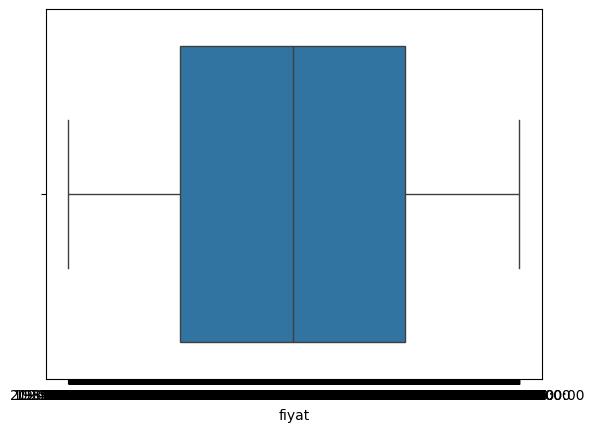

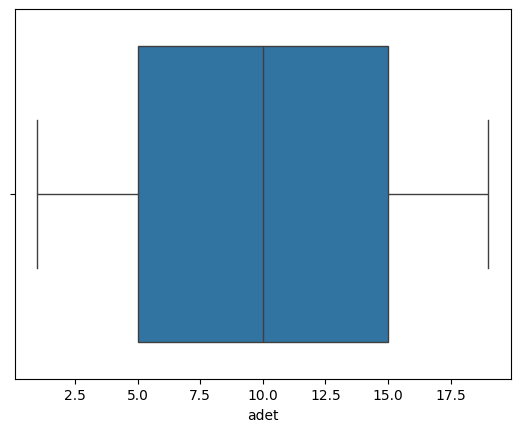

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fiyat sütunundaki aykırı değerleri görmek için boxplot
sns.boxplot(x=df_satis['fiyat'])
plt.show()

# Adet sütunundaki aykırı değerleri görmek için boxplot
sns.boxplot(x=df_satis['adet'])
plt.show()

In [166]:
from scipy import stats

# Z-Score hesapla
z_scores = stats.zscore(df_satis_converted[['fiyat', 'adet', 'toplam_satis']])

# Z-Score değeri 3'ten büyük olan veriler aykırı olabilir
outliers = (abs(z_scores) > 3)
outlier_rows = df_satis[(outliers).any(axis=1)]
outlier_rows

,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id
687,2023-10-05,P063,Klima,Elektronik,1490.44,19,28318.36,3023
1210,2024-09-27,P010,Çanta,Giyim,1486.3,18,26753.4,3189
1361,2024-07-09,P097,Su Şişesi,Mutfak Ürünleri,1494.69,18,26904.42,5205
1501,2023-03-02,P032,Mouse,Elektronik,1413.61,19,26858.59,4882
1808,2024-10-27,P063,Klima,Elektronik,1478.55,19,28092.45,3292
1966,2023-10-15,P011,Kalem,Kırtasiye,1496.85,19,28440.15,1966
2399,2024-01-05,P087,Kulaklık,Elektronik,1490.59,18,26830.62,3311
2823,2023-08-18,P097,Su Şişesi,Mutfak Ürünleri,1498.63,18,26975340000000000,9709
3326,2023-05-17,P082,Defter,Kırtasiye,1440.04,19,27360.76,3887
3851,2023-05-24,P010,Çanta,Giyim,1495.75,19,28419.25,1249


In [167]:
df = pd.merge(df_musteri, df_satis_converted)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   musteri_id       5000 non-null   int64         
 1   isim             5000 non-null   object        
 2   cinsiyet         5000 non-null   object        
 3   yas              5000 non-null   int64         
 4   sehir            5000 non-null   object        
 5   harcama_miktari  5000 non-null   float64       
 6   tarih            5000 non-null   datetime64[ns]
 7   ürün_kodu        5000 non-null   object        
 8   ürün_adi         5000 non-null   object        
 9   kategori         5000 non-null   object        
 10  fiyat            5000 non-null   float64       
 11  adet             5000 non-null   int64         
 12  toplam_satis     5000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 507.9+ KB


In [169]:
df= df.sort_values(by='musteri_id').reset_index(drop=True)

In [170]:
df.head(15)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,1004,Saba,Kadın,28,Bursa,4158.37,2023-12-15,P037,Fırın,Ev Aletleri,645.0,18,11610.0
1,1004,Saba,Kadın,28,Bursa,4158.37,2024-03-27,P032,Mouse,Elektronik,136.0,16,2176.0
2,1006,Aysuna,Erkek,54,Gaziantep,3531.40,2024-06-19,P082,Defter,Kırtasiye,1489.0,10,14890.0
3,1007,Köktaş,Kadın,24,Gaziantep,879.51,2024-01-16,P087,Kulaklık,Elektronik,1378.0,3,4134.0
4,1009,İnançlı,Erkek,67,Konya,4156.24,2024-05-19,P010,Çanta,Giyim,1405.0,2,2810.0
5,1009,İnançlı,Erkek,67,Konya,4156.24,2024-01-17,P018,Telefon,Elektronik,1101.0,8,8808.0
6,1012,Jankat,Kadın,21,Adana,459.29,2024-05-21,P063,Klima,Elektronik,1092.0,5,5460.0
7,1013,Dilhuş,Erkek,58,Antalya,3575.91,2023-04-23,P032,Mouse,Elektronik,967.0,7,6769.0
8,1013,Dilhuş,Erkek,58,Antalya,3575.91,2022-11-06,P010,Çanta,Giyim,73.0,12,876.0
9,1015,Zerafet,Kadın,42,Konya,811.78,2024-06-05,P063,Klima,Elektronik,782.0,17,13294.0


In [171]:
# Haftalık ve aylık gruplamalar için yıl-hafta ve yıl-ay bilgileri ekleme
df["yil_hafta"] = df["tarih"].dt.strftime("%Y-%U")  # Yıl-Hafta
df["yil_ay"] = df["tarih"].dt.to_period("M")        # Yıl-Ay

In [172]:
haftalik_satis = df.groupby("yil_hafta")["toplam_satis"].sum().reset_index()
aylik_satis = df.groupby("yil_ay")["toplam_satis"].sum().reset_index()

In [173]:
urun_haftalik = df.groupby(["yil_hafta", "ürün_adi"])["toplam_satis"].sum().reset_index()
urun_aylik = df.groupby(["yil_ay", "ürün_adi"])["toplam_satis"].sum().reset_index()

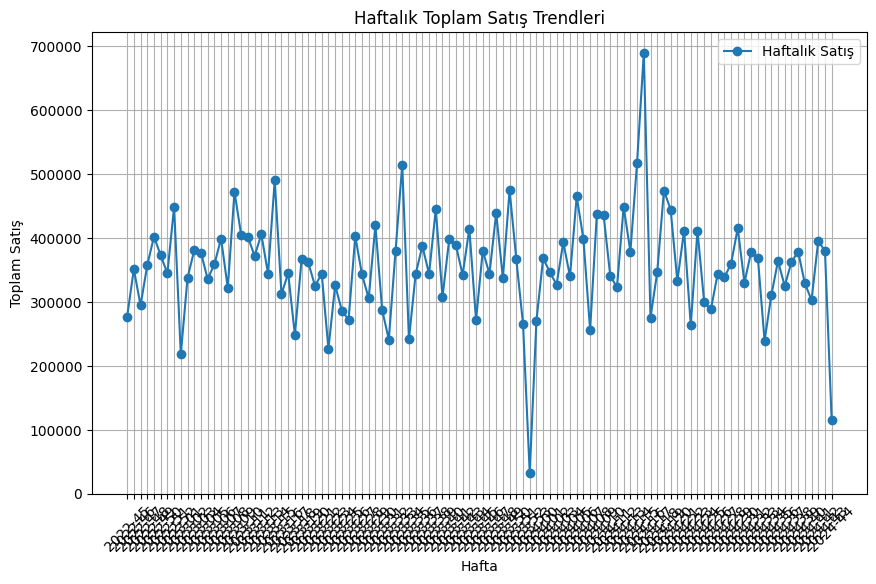

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(haftalik_satis["yil_hafta"], haftalik_satis["toplam_satis"], marker="o", label="Haftalık Satış")
plt.xticks(rotation=45)
plt.title("Haftalık Toplam Satış Trendleri")
plt.xlabel("Hafta")
plt.ylabel("Toplam Satış")
plt.legend()
plt.grid()
plt.show()


In [177]:
# Her ayın ilk ve son satış gününü bulmak
aylik_ilk_son = df.groupby(df["tarih"].dt.to_period("M"))["tarih"].agg(["min", "max"]).reset_index()
aylik_ilk_son.columns = ['yil_ay', 'ilk_satis_gunu', 'son_satis_gunu']

# 2. Her hafta kaç ürün satıldığını hesaplama
# Haftalık satış sayısını hesaplamak için 'yil_hafta' sütununu kullanıyoruz
haftalik_satis_urun = df.groupby("yil_hafta")["adet"].sum().reset_index()
haftalik_satis_urun.columns = ['yil_hafta', 'toplam_satis_urun']

# Sonuçları inceleyelim
print("Aylık İlk ve Son Satış Günleri:")
print(aylik_ilk_son.head())

print("\nHaftalık Toplam Ürün Satışları:")
print(haftalik_satis_urun)

Aylık İlk ve Son Satış Günleri:
    yil_ay ilk_satis_gunu son_satis_gunu
0  2022-11     2022-11-06     2022-11-30
1  2022-12     2022-12-01     2022-12-31
2  2023-01     2023-01-01     2023-01-31
3  2023-02     2023-02-01     2023-02-28
4  2023-03     2023-03-01     2023-03-31

Haftalık Toplam Ürün Satışları:
    yil_hafta  toplam_satis_urun
0     2022-45                422
1     2022-46                483
2     2022-47                423
3     2022-48                505
4     2022-49                483
..        ...                ...
101   2024-40                551
102   2024-41                407
103   2024-42                620
104   2024-43                513
105   2024-44                137

[106 rows x 2 columns]


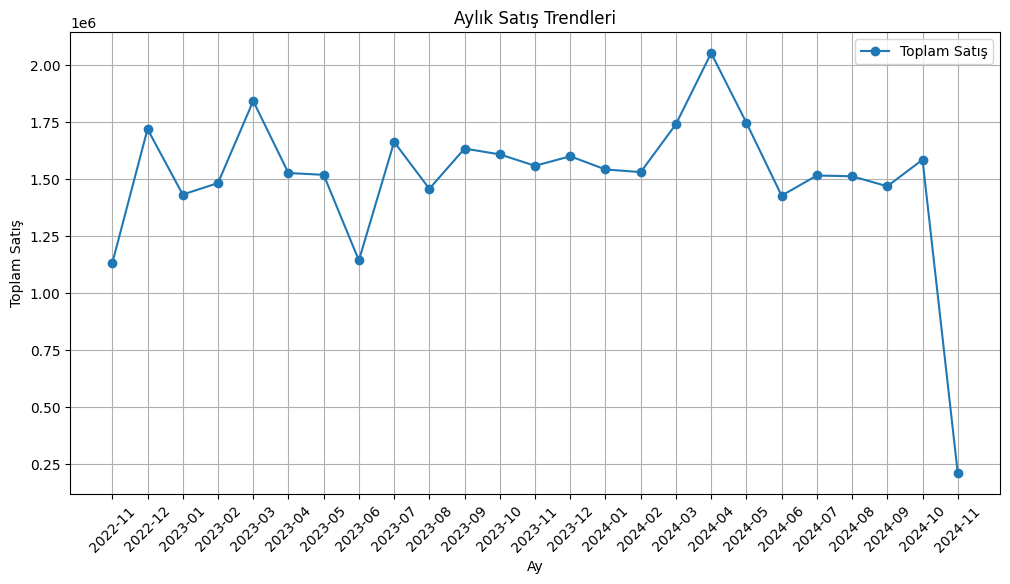

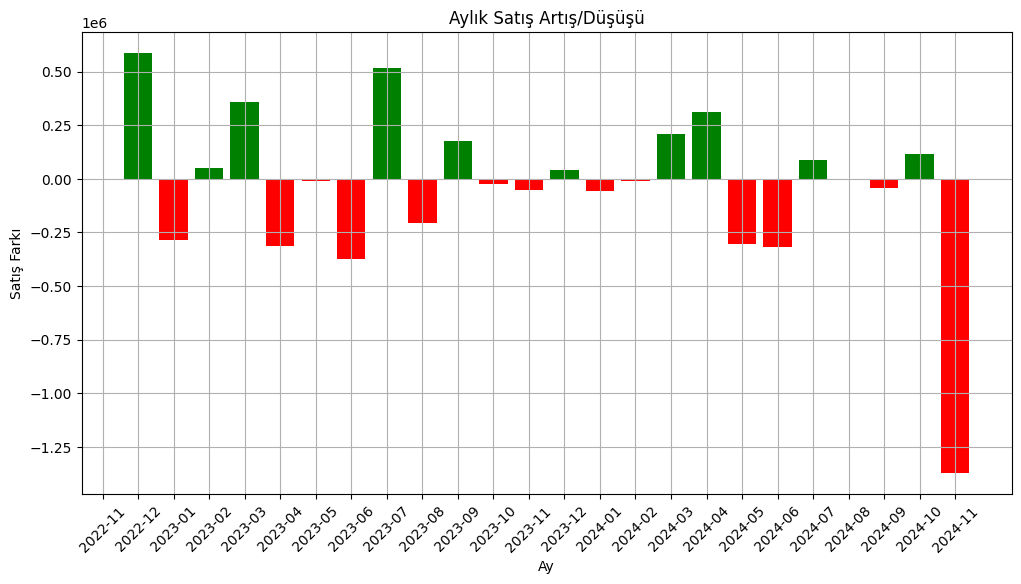

In [178]:
# 1. Aylık toplam satışları hesaplayalım
# Veri çerçevesini aylık olarak gruplayacağız
aylik_satis = df.groupby(df["tarih"].dt.to_period("M"))["toplam_satis"].sum().reset_index()

# 2. Zaman serisi görselleştirmesi
plt.figure(figsize=(12, 6))
plt.plot(aylik_satis["tarih"].astype(str), aylik_satis["toplam_satis"], marker="o", label="Toplam Satış")
plt.xticks(rotation=45)
plt.title("Aylık Satış Trendleri")
plt.xlabel("Ay")
plt.ylabel("Toplam Satış")
plt.grid(True)
plt.legend()
plt.show()

# 3. Aylık artış/düşüş analizi
# Bir önceki aya göre farkı hesaplayalım (artış/düşüş)
aylik_satis["fark"] = aylik_satis["toplam_satis"].diff()

# 4. Artış ve düşüş grafiği
plt.figure(figsize=(12, 6))
plt.bar(aylik_satis["tarih"].astype(str), aylik_satis["fark"], color=["green" if x >= 0 else "red" for x in aylik_satis["fark"]])
plt.title("Aylık Satış Artış/Düşüşü")
plt.xlabel("Ay")
plt.ylabel("Satış Farkı")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [179]:
# 1. Kategorilere göre toplam satış miktarını hesaplayalım
kategori_toplam_satis = df.groupby("kategori")["toplam_satis"].sum().reset_index()

# 2. Tüm satışların toplamını hesaplayalım
toplam_satis = df["toplam_satis"].sum()

# 3. Her kategorinin toplam satışlar içindeki oranını hesaplayalım
kategori_toplam_satis["oran"] = kategori_toplam_satis["toplam_satis"] / toplam_satis * 100

# Sonuçları yazdıralım
print(kategori_toplam_satis)

          kategori  toplam_satis       oran
0       Elektronik  1.827995e+07  48.580618
1      Ev Aletleri  3.796418e+06  10.089321
2            Giyim  3.921024e+06  10.420472
3        Kırtasiye  7.858590e+06  20.884907
4  Mutfak Ürünleri  3.772095e+06  10.024682


<ipython-input-180-dc7c27878b78>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yas_grubu_toplam_satis = df.groupby('yas_grubu')['toplam_satis'].sum().reset_index()


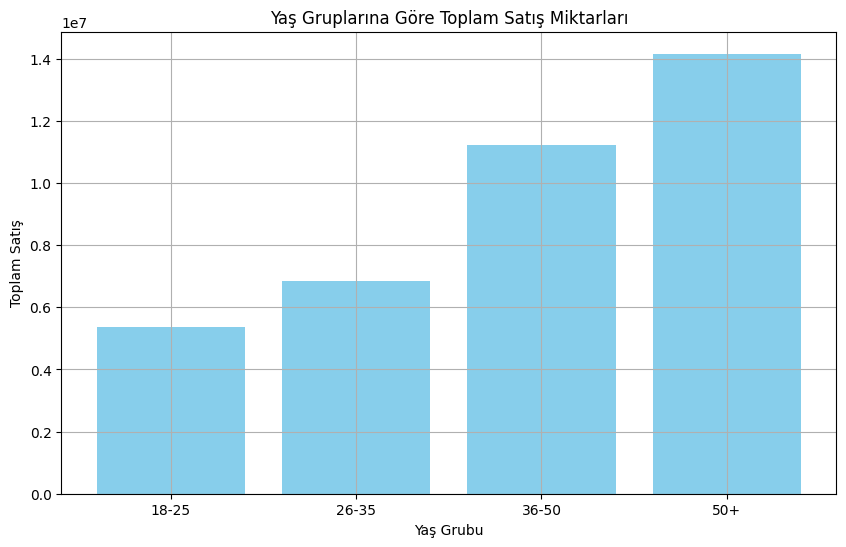

  yas_grubu  toplam_satis       oran
0     18-25  5.381121e+06  14.300812
1     26-35  6.858248e+06  18.226410
2     36-50  1.122256e+07  29.824962
3       50+  1.416615e+07  37.647816


In [180]:

# Yaş gruplarını tanımlayalım
bins = [0, 25, 35, 50, float('inf')]  # 18-25, 26-35, 36-50, 50+
labels = ['18-25', '26-35', '36-50', '50+']

# Yaş gruplarına göre yeni bir sütun ekleyelim
df['yas_grubu'] = pd.cut(df['yas'], bins=bins, labels=labels, right=False)

# 1. Yaş gruplarına göre toplam satışları hesaplayalım
yas_grubu_toplam_satis = df.groupby('yas_grubu')['toplam_satis'].sum().reset_index()

# 2. Yaş gruplarına göre toplam satışları görselleştirelim
plt.figure(figsize=(10, 6))
plt.bar(yas_grubu_toplam_satis['yas_grubu'], yas_grubu_toplam_satis['toplam_satis'], color='skyblue')
plt.title("Yaş Gruplarına Göre Toplam Satış Miktarları")
plt.xlabel("Yaş Grubu")
plt.ylabel("Toplam Satış")
plt.grid(True)
plt.show()

# 3. Yaş gruplarının toplam satışlar içindeki oranlarını hesaplayalım
toplam_satis = df['toplam_satis'].sum()
yas_grubu_toplam_satis['oran'] = yas_grubu_toplam_satis['toplam_satis'] / toplam_satis * 100

# Sonuçları yazdıralım
print(yas_grubu_toplam_satis)


<ipython-input-181-4c1114a82e7a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cinsiyet", y="harcama_miktari", data=cinsiyet_grup, palette="Set2")


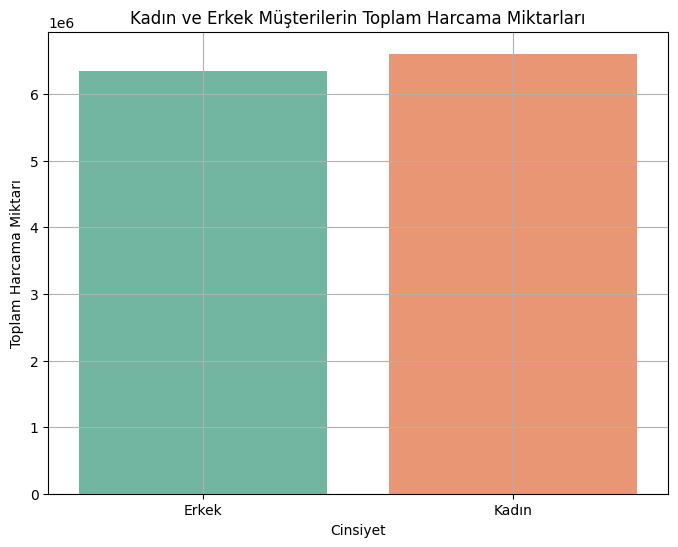

In [181]:
from scipy import stats

# 1. Kadın ve erkekleri gruplama
cinsiyet_grup = df.groupby("cinsiyet")["harcama_miktari"].sum().reset_index()

# 2. Kadın ve erkeklerin toplam harcama miktarlarını görselleştirelim
plt.figure(figsize=(8, 6))
sns.barplot(x="cinsiyet", y="harcama_miktari", data=cinsiyet_grup, palette="Set2")
plt.title("Kadın ve Erkek Müşterilerin Toplam Harcama Miktarları")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Harcama Miktarı")
plt.grid(True)
plt.show()

# 3. Kadın ve erkeklerin harcama miktarları arasındaki farkı tespit edelim (t-testi)
kadın_harcama = df[df["cinsiyet"] == "Kadın"]["harcama_miktari"]
erkek_harcama = df[df["cinsiyet"] == "Erkek"]["harcama_miktari"]

# Bağımsız iki örneklem için t-testi
t_test_result = stats.ttest_ind(kadın_harcama, erkek_harcama)

       sehir  harcama_miktari
4  Gaziantep       1740073.60
7      İzmir       1739145.40
3      Bursa       1665417.27
1     Ankara       1649167.77
2    Antalya       1581436.54
5      Konya       1556038.91
0      Adana       1552729.00
6   İstanbul       1470821.34


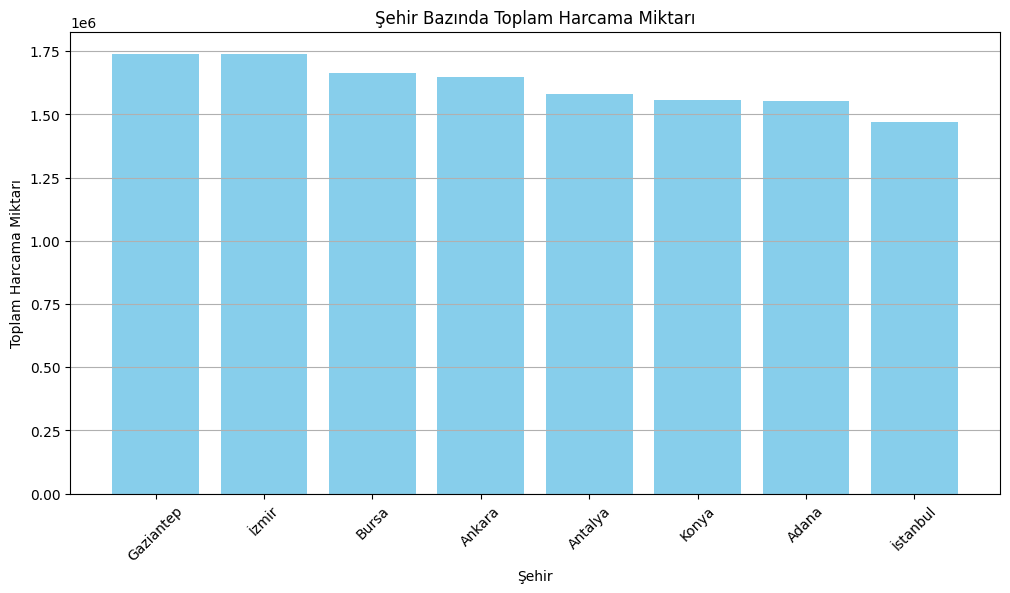

In [182]:
# 1. Şehir bazında toplam harcama miktarını hesaplayalım
sehir_harcama = df.groupby("sehir")["harcama_miktari"].sum().reset_index()

# 2. Şehirleri toplam harcama miktarına göre azalan sırayla sıralayalım
sehir_harcama = sehir_harcama.sort_values(by="harcama_miktari", ascending=False)

# 3. Şehirleri sıralanmış şekilde gösterelim
print(sehir_harcama)

# 4. Şehirleri görselleştirelim (opsiyonel)
plt.figure(figsize=(12, 6))
plt.bar(sehir_harcama["sehir"], sehir_harcama["harcama_miktari"], color='skyblue')
plt.xticks(rotation=45)
plt.title("Şehir Bazında Toplam Harcama Miktarı")
plt.xlabel("Şehir")
plt.ylabel("Toplam Harcama Miktarı")
plt.grid(axis="y")
plt.show()

In [183]:
# 1. Veriyi ürün ve aylık bazda gruplayalım
urun_aylik = df.groupby(["ürün_adi", "yil_ay"])["toplam_satis"].sum().reset_index()

# 2. Satış değişim yüzdesini hesaplayalım
urun_aylik["yil_ay"] = urun_aylik["yil_ay"].astype(str)  # Yıl-Ay sütununu string türüne dönüştür
urun_aylik["yil_ay"] = pd.to_datetime(urun_aylik["yil_ay"], format='%Y-%m')  # Yıl-Ay formatında tarih dönüşümü

# Satış değişim yüzdesi hesaplama
urun_aylik["degisimi"] = urun_aylik.groupby("ürün_adi")["toplam_satis"].pct_change() * 100

# 3. Her ürün için ortalama satış değişim yüzdesini hesaplayalım
urun_ortalama_artis = urun_aylik.groupby("ürün_adi")["degisimi"].mean().reset_index()

# 4. Sonuçları görüntüleyelim
print(urun_ortalama_artis)

     ürün_adi   degisimi
0  Bilgisayar  15.836790
1      Defter   6.258307
2       Fırın  10.081641
3       Kalem  13.086490
4       Klima   6.338375
5    Kulaklık  10.365041
6       Mouse   5.671485
7   Su Şişesi   7.368329
8     Telefon   0.301245
9       Çanta   8.529914


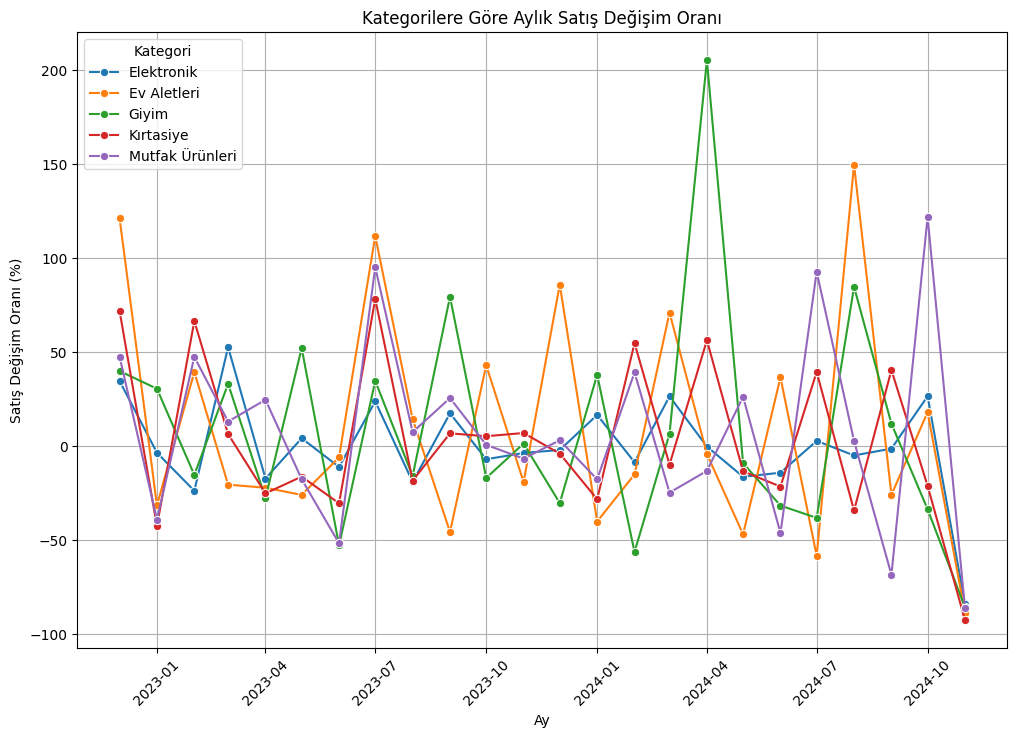

In [184]:
# 1. Kategorilere göre aylık toplam satışları hesapla
kategori_aylik = df.groupby(["kategori", "yil_ay"])["toplam_satis"].sum().reset_index()

# 2. Satış değişim oranını hesapla (yüzde değişim)
kategori_aylik["yil_ay"] = pd.to_datetime(kategori_aylik["yil_ay"].astype(str), format='%Y-%m')  # Yıl-Ay sütunu datetime formatına çevrildi
kategori_aylik["degisimi"] = kategori_aylik.groupby("kategori")["toplam_satis"].pct_change() * 100

# 3. Grafik için hazırlık: Kategoriler için değişim oranlarını çizdir
plt.figure(figsize=(12, 8))
sns.lineplot(data=kategori_aylik, x="yil_ay", y="degisimi", hue="kategori", marker="o")

# 4. Grafiği düzenle
plt.title("Kategorilere Göre Aylık Satış Değişim Oranı")
plt.xlabel("Ay")
plt.ylabel("Satış Değişim Oranı (%)")
plt.xticks(rotation=45)
plt.legend(title="Kategori")
plt.grid(True)

# 5. Grafiği göster
plt.show()